# Automated Machine Learning (Auto ML) with PyCaret
In this project, we embark on a journey into the realm of Data Science and Machine Learning, specifically tailored for the Health sector. Our mission is to conduct an in-depth exploratory analysis of the provided dataset, followed by the creation of a predictive model aimed at estimating insurance values based on the rich information encapsulated within.

## Project Objectives
### 1. Exploratory Analysis:
Uncover insights through a comprehensive exploratory analysis of the dataset, gaining a deep understanding of the underlying patterns and relationships.

### 2. Predictive Modeling:
Develop a robust predictive model utilizing the Regression technique. This model will serve as a valuable tool in estimating insurance values, contributing to informed decision-making in the Health Insurance domain.

## Key Components:
1. **Algorithm Selection**: Auto ML automates the tedious task of algorithm selection, choosing the most suitable models for our regression task.

2. **Hyperparameter Tuning**: The optimization of model parameters is handled seamlessly, ensuring the best possible performance without the need for manual tuning.

3. **Model Evaluation**: Auto ML provides automated model evaluation, enabling us to assess performance metrics and choose the most effective model for our specific Health Insurance prediction requirements.

## Variable dictionary
- `Age`: Age
- `Sex`: Gender i.e. Male/Female
- `BMI`: Body Mass Index
- `Children`: How many children do they have?
- `Smoker`: Whether the person is an active smoker or not?
- `Region`: Region in which the person resides.
- `Charges`: Amount charged for health insurance.


### Importing pandas
- If `pandas` library is not already installed. You might get an error. In that case, install pandas.
    - On Mac, pip3 install pandas
    - On Windows, pip install pandas
 

In [3]:
import pandas as pd

### Importing the dataset
- Delcaring 'df' i.e. the dataframe in which the `.csv` file.

In [4]:
df = pd.read_csv("Original Datasets/insurance.csv")

- To view the top 5 elements of the dataset.

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- To view the number of column and row parameters.

In [6]:
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataframe has 1338 rows and 7 columns.


- For listing down all the column names.

In [7]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


### Describing all the paramters.

In [8]:
print("All the parameters from the 'Age' column:\n")
print(df.age.describe(),"\n\n")

print("All the parameters from the 'BMI' column:\n")
print(df.bmi.describe(),"\n\n")

print("All the parameters from the 'Charges' column:\n")
print(df.charges.describe())

All the parameters from the 'Age' column:

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64 


All the parameters from the 'BMI' column:

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64 


All the parameters from the 'Charges' column:

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


- To make our work easier and improve the readability of the model.
- We will create a column of binary values ​​for "smokers" or "non-smokers".

In [9]:
df["is_smoker"] = df["smoker"].map({"yes":1, "no":0})

print(df["is_smoker"].head())

0    1
1    0
2    0
3    0
4    0
Name: is_smoker, dtype: int64


- In a similar way, we did that for the previous `smoker`. We will create a binary column for `children`.
- Unlike the `smoker` column, this information does not just present `yes` or `no`, but the number of children.
    - `0`: If you do not have any children
    - `1`: If you have one or more children.

In [10]:
df["has_children"] = df["children"].apply(lambda x : 1 if x > 0 else 0)
df["has_children"].head()

0    0
1    1
2    1
3    0
4    0
Name: has_children, dtype: int64

## Exploratory analysis
- Analyzing and understanding in depth the information contained in our dataset, what is actually relevant and identifying patterns.
- To do this, we will use plots to help visualize the information.

#### Installing Seaborn
- We will be working with `seaborn`. We will first installing `seaborn` in order to run the script.

In [11]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Age Distribution
- In our exploratory analysis, we want to understand key features in our database to better understand the problem. So, we can monitor a model that is appropriate for this information. In this way, we will understand the situation of each topic and the correlations of information, by taking key points of our interest into consideration.
- Below we see the distribution of customers by age:

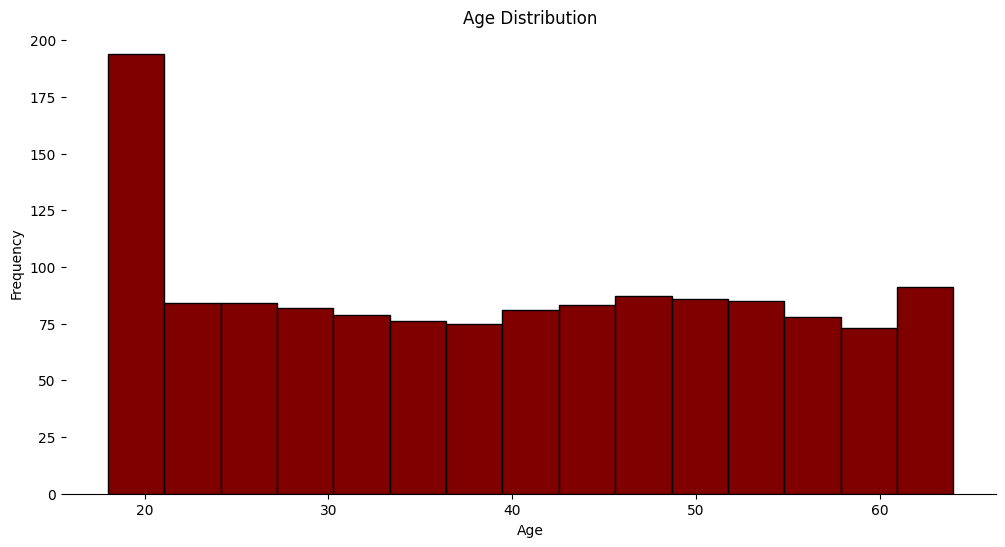

In [13]:
# Creating a histograph

plt.figure(figsize=(12,6))

ax = plt.gca()

plt.hist(df["age"], bins = 15, color = "maroon", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

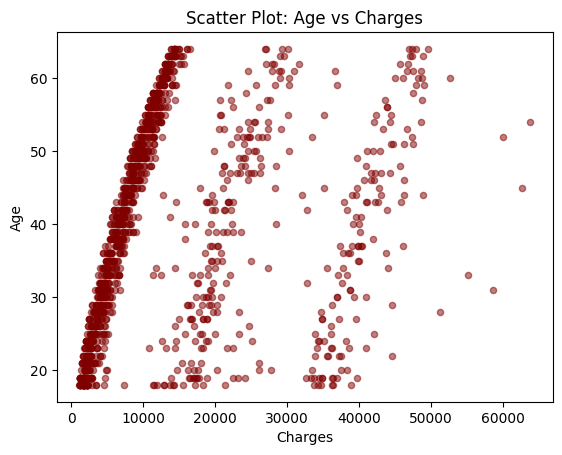

In [14]:
# Creating a scatter plot

df.plot.scatter(x='charges', y='age', alpha=0.5, color="maroon")

plt.xlabel('Charges')
plt.ylabel('Age')
plt.title('Scatter Plot: Age vs Charges')

plt.show()

- Scatter plot helps us to identify, the relation in between age along with the costs.
- Here in this case, we identify where the darkest points are, where most customers are in the $0 to around $11,0000-$12,000 range.
- We may also figure out what seem to be groups, where the patterns are similar to the preceding one but a bit further ahead, suggesting a greater price.
- The pattern repeats itself  three times.
- After $50,000, there are still some outliers that we can take into account.

### Gender Distribution

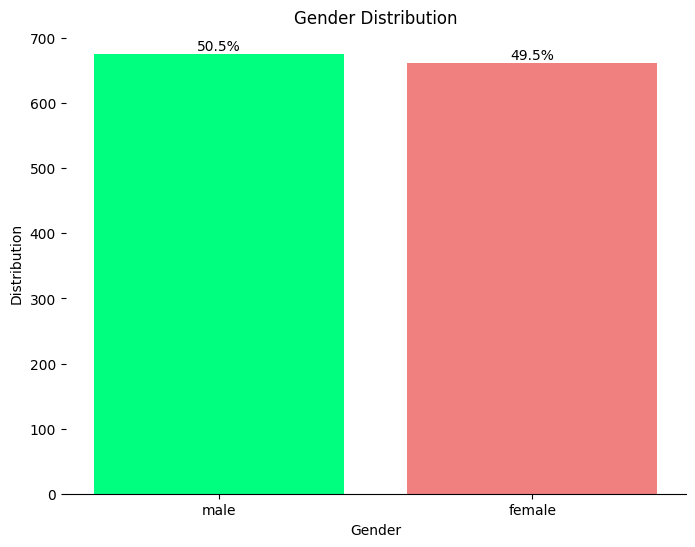

In [15]:
gender_counts = df["sex"].value_counts()

total = gender_counts.sum()
gender_percentages = (gender_counts / total) * 100

plt.figure(figsize=(8,6))
ax = plt.gca()
bars = plt.bar(gender_counts.index, gender_counts.values, color = ["springgreen", "lightcoral"])
plt.xlabel("Gender")
plt.ylabel("Distribution")
plt.title("Gender Distribution")

for bar, percentage in zip(bars, gender_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

- In isolation, this gender distribution information does not tell us much about the data.
- But it is interesting to identify that we almost have a 50/50 balance between male and female candidates.

### BMI Distribution
- BMI, or Body Mass Index, is a numerical measure used to assess an individual's body weight in relation to their height. It is calculated by dividing a person's weight by their height.
- BMI provides an estimate of whether a person has a healthy body weight, is underweight, overweight, or obese, and it is often used in healthcare settings as a screening tool to evaluate potential health risks associated with an individual's weight.

##### BMI Categories:
- **Underweight** = <18.5
- **Normal weight** = 18.5–24.9
- **Overweight** = 25–29.9
- **Obesity** = BMI of 30 or greater

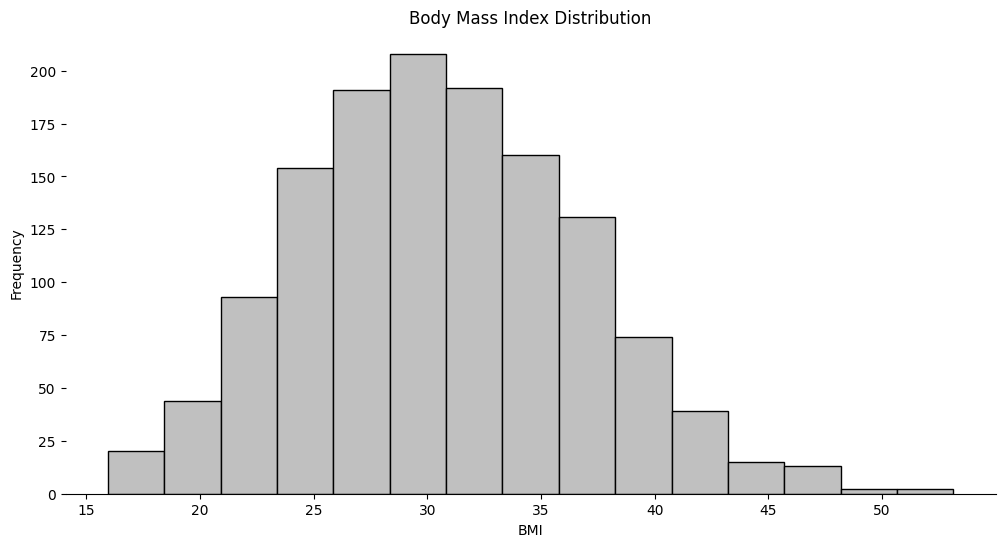

In [16]:
plt.figure(figsize=(12,6))

ax = plt.gca()

plt.hist(df["bmi"], bins = 15, color = "silver", edgecolor="black")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Body Mass Index Distribution")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

- This particular set of data has the potential to significantly impact our target variable, "charges".
- Based on your BMI, you might be more susceptible to health issues and require medical attention more frequently and for a longer period of time, or you might be in the highly healthy group and have fewer hazards.
- We can see from our data set that the majority of patients fall into the 25–34 BMI range, with the largest proportion falling into the 30-BMI range.
Furthermore, by accepted measures, they are poor results for the team.
- As per this categorization, the only people who would be considered to be at their normal weight are those whose BMI falls between 18.5 and 24.9.
- A BMI of greater than that would be considered overweight up to 29.9, and obese after 30.

### Region

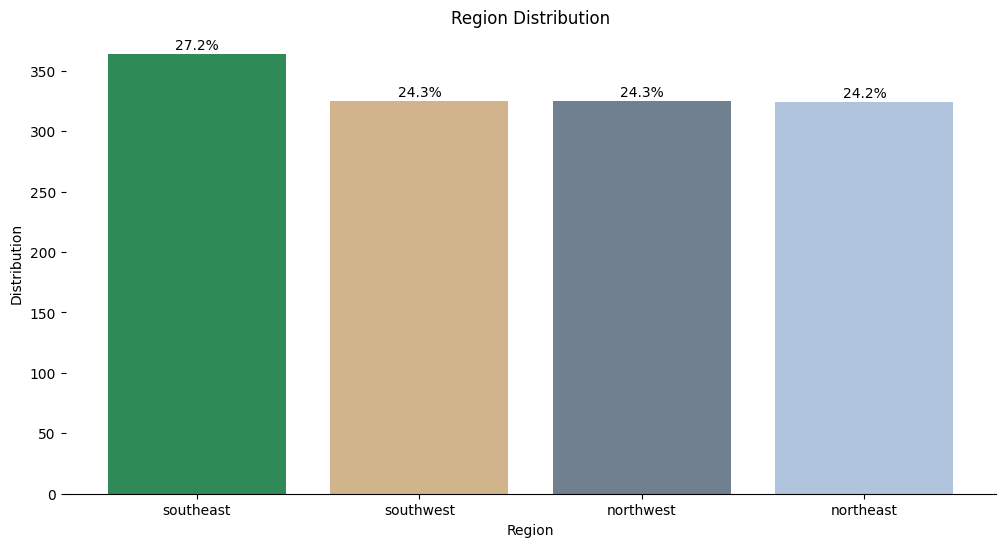

In [17]:
region_counts = df["region"].value_counts()

total = region_counts.sum()
region_percentages = (region_counts / total) * 100

plt.figure(figsize=(12,6))
ax = plt.gca()
bars = plt.bar(region_counts.index, region_counts.values, color = ["seagreen", "tan", "slategrey", "lightsteelblue"])
plt.xlabel("Region")
plt.ylabel("Distribution")
plt.title("Region Distribution")

for bar, percentage in zip(bars, region_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

- The `southeast` group appeared to have a somewhat wider spread, but all things considered, we found that this group was chosen with balance across the regions.

### Smoker
- It is well known that smoking is bad for your health. It is therefore reasonable to assume that while obtaining health insurance, a nonsmoker will have different conditions.
- In this manner, we will examine the distribution of smokers and non-smokers in our database and subsequently connect it to the expenses incurred by our customer.

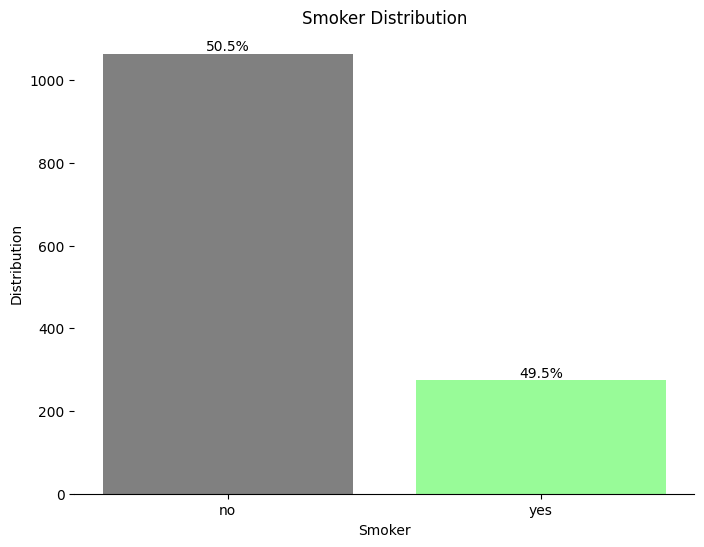

In [18]:
smoker_counts = df["smoker"].value_counts()

total = smoker_counts.sum()
smoker_percentages = (smoker_counts / total) * 100

plt.figure(figsize=(8,6))
ax = plt.gca()
bars = plt.bar(smoker_counts.index, smoker_counts.values, color = ["gray", "palegreen"])
plt.xlabel("Smoker")
plt.ylabel("Distribution")
plt.title("Smoker Distribution")

for bar, percentage in zip(bars, gender_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', va='bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

- Additionally, the percentage of smokers among patrons is balanced, with the majority being marginally non-smokers.
- Nonetheless, there is a mathematically equal population between the two groups.

### Correlation Matrix
- An essential tool for analyzing a DataFrame is a correlation matrix, which offers a thorough picture of the relationships between the variables.
- Correlation coefficients, which quantify the degree and direction of relationships between data columns, are shown in this matrix.
This matrix is useful for finding patterns and unnoticed trends in the data.
- Strong positive correlations are shown by values around +1, strong negative correlations by values close to -1, and no correlations are indicated by values of 0.
- Analysts are able to make well-informed judgments based on this data, including the identification of multicollinearity, which can impact the precision of regression models, and the selection of pertinent variables for statistical modeling.
- To summarise, the correlation matrix is an invaluable instrument for comprehending the connections among variables and directing more in-depth examinations.

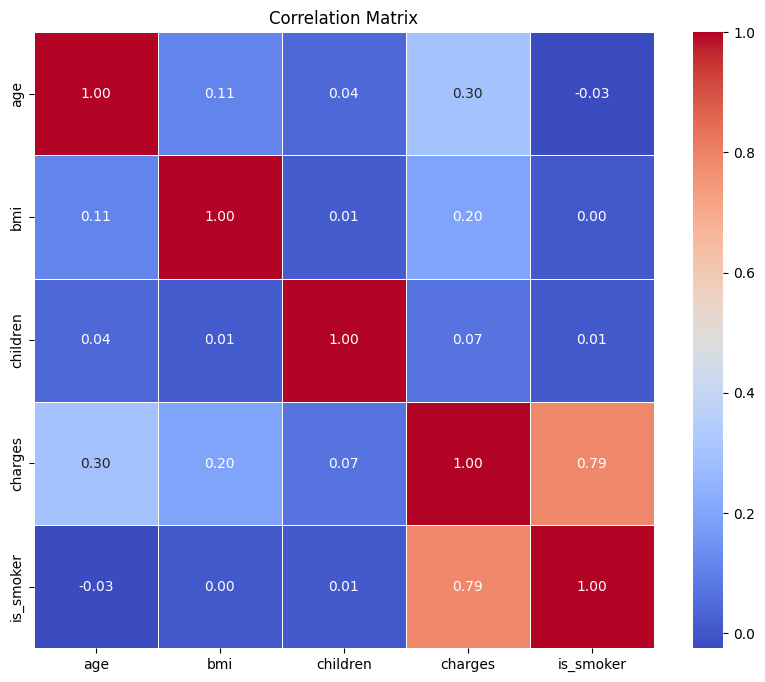

In [19]:
# Assuming 'sex' is a categorical variable
columns_to_remove = ["smoker", "has_children"]
numeric_columns = df.drop(columns=columns_to_remove).select_dtypes(include='number').columns
df_filtered = df[numeric_columns]
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

- In our correlation matrix we identified variables related to each other, demonstrated by their degree of relationship.

- Considering the target variable as `charges`, the correlation pattern follows the following order, from highest to lowest correlation:
    - `is_smoker` - The person being a smoker has a high degree of variation in the `charges` variable - 0.79.
    - `age` - The person's age also plays a role in relation to the costs involved, but to a lesser extent.
    - `bmi` - It was expected that BMI could have an impact on the `charges` column, however, with the correlation at just 0.20, we identified a low-impact relationship.
    - `children` - This is the variable with the smallest relation to `charges`

**Note**: We identified a negative relationship of -0.03 between `is_smoker` and `age`.

## Auto ML Model
- PyCaret, an auto machine learning framework, will be used for our research.
- An open-source Python package called PyCaret was created to make creating and implementing machine learning models easier.
- Its capabilities cover everything in one environment, from model selection and performance evaluation to data processing.
- PyCaret provides a high-level interface that lets analysts and data scientists explore different modeling approaches rapidly, tune hyperparameters, and automate routine activities like encoding categorical variables and handling missing values.
- PyCaret is a useful tool for accelerating machine learning and data analysis projects, saving experts time and effort. It also simplifies model deployment.
- PyCaret and AutoML (Automated Machine Learning) are closely similar concepts.
- The term "autoML" describes the automation of critical processes including data pretreatment, model selection, hyperparameter optimization, and performance assessment that are part of the machine learning model development lifecycle.
- The machine learning model generation process can be sped up and made simpler by utilizing PyCaret's AutoML features.
- With PyCaret, data scientists and analysts may concentrate more on analyzing data and formulating strategic plans by automating a large number of laborious and complicated operations.
- Professionals may do cross-validation, develop performance graphs, tweak hyperparameters, experiment with various modeling algorithms, and even deploy models into production all inside a single PyCaret environment.
- This improves efficiency and accessibility of the model generation process for a broad variety of users, irrespective of their degree of machine learning knowledge. To sum up, PyCaret is a tool that makes AutoML implementation easier and makes it easier to create machine learning models that are of a high caliber.

In [20]:
#separating data into test and training

test = df.sample(frac=0.10)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [21]:
print("Test Data:",test.shape)
print("Train Data:",train.shape)

Test Data: (134, 9)
Train Data: (1204, 9)


### Importing PyCaret Regression library

In [22]:
from pycaret.regression import *

- At this point, we will pass our data to PyCaret to start exploring the data and preparing our model.
- Here, we will create a regressor (reg), and we will pass the data, and the target variable.

In [23]:
reg = setup(data=train, target = "charges")

,Description,Value
0,Session id,8443
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1204, 9)"
4,Transformed data shape,"(1204, 12)"
5,Transformed train set shape,"(842, 12)"
6,Transformed test set shape,"(362, 12)"
7,Ordinal features,2
8,Numeric features,5
9,Categorical features,3


### Creating a Pipeline

In [24]:
reg = setup(data = train,
            target = "charges",
            normalize = True,
            log_experiment = True,
            experiment_name = "charges_01")

,Description,Value
0,Session id,7497
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1204, 9)"
4,Transformed data shape,"(1204, 12)"
5,Transformed train set shape,"(842, 12)"
6,Transformed test set shape,"(362, 12)"
7,Ordinal features,2
8,Numeric features,5
9,Categorical features,3


### Comparing Models
- If you have a particular model that you must use, then there's no need to compare models; but, in real life, this is rarely the case. Usually, one has to evaluate the circumstances and choose the best model.
- When doing this, comparing each model will be a great place to start.
- This function trains all models in the PyCaret library and evaluates them using cross-validation. For evaluation, the function prints a table that shows the average of MAE, MSE, RMSE, R2, RMSLE and MAPE across the folds (10 by default) of all models available in the library.
    - `MAE` - Mean Absolute Error shows the mean error in absolute values.
    - `MSE` - Mean Squared Error
    - `RMSE` - Root Mean Squared Error
    - `R2` - Coefficient of Determination R2 Score
    - `RMSLE` - Root Mean Squared Log Error
    - `MAPE` - Mean Absolute Percentage Error shows the mean absolute error in percentage values.

In [25]:
# To list down all the models.
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [26]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2471.7012,21540606.7849,4605.3965,0.8512,0.4206,0.2810,0.0180
rf,Random Forest Regressor,2557.7118,23070516.7845,4763.3497,0.8410,0.4399,0.2881,0.0340
lightgbm,Light Gradient Boosting Machine,2727.1890,23285069.8254,4790.7787,0.8385,0.5051,0.3258,0.3800
ada,AdaBoost Regressor,3731.5645,26360445.7102,5111.0161,0.8169,0.5729,0.6081,0.0090
et,Extra Trees Regressor,2610.6816,26702057.4744,5141.3105,0.8149,0.4525,0.2809,0.0310
knn,K Neighbors Regressor,3596.0664,35638600.4000,5889.7805,0.7586,0.4813,0.3729,0.0090
ridge,Ridge Regression,3989.4303,36027764.9109,5964.1704,0.7532,0.5546,0.4126,0.0080
br,Bayesian Ridge,3990.8074,36025482.1929,5963.8633,0.7532,0.5482,0.4129,0.0080
lasso,Lasso Regression,3988.9260,36028923.0894,5964.2905,0.7531,0.5559,0.4124,0.0090
lr,Linear Regression,3992.8500,36094252.0164,5970.0600,0.7526,0.5562,0.4152,0.1630


- Using 10 folds of cross-validation, more than 15 models were constructed. We next assessed the models using the six most popular evaluation metrics (MAE, MSE, RMSE, R2, RMSLE, and MAPE).
- The models with the greatest outcomes in the averages of the evaluation criteria are highlighted in the score table given above for comparison. The grid is arranged from R2 (highest to lowest) by default.

In [27]:
print ("The best model found by the function was:", best)

The best model found by the function was: GradientBoostingRegressor(random_state=7497)


### Instantiating the Model
- The best model found was the **Gradient Boosting Regressor** or **GBR**.
- The `compare_models()` function is very useful and makes the work easier, but it does not return a trained model.
- Given this, we will use the GBR model and focus on our model.

In [28]:
gbr = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1860.9764,12613897.2790,3551.6049,0.8868,0.4280,0.2748
1,2602.4530,25058643.9662,5005.8610,0.8787,0.4305,0.2486
2,2695.4107,21115250.4189,4595.1333,0.8547,0.3754,0.2529
3,2664.3667,22242926.5080,4716.2407,0.8695,0.3840,0.2759
4,2526.1046,24518994.7660,4951.6659,0.8085,0.3749,0.2478
5,1991.3444,12804442.5683,3578.3296,0.8992,0.4217,0.2973
6,2692.8390,28374382.1975,5326.7609,0.8494,0.3955,0.2287
7,2792.9740,26807815.7868,5177.6265,0.8064,0.4952,0.3220
8,2297.2171,21199272.8560,4604.2668,0.8133,0.4604,0.3137


Just like in `compare_models`, in `create_model` you can change the number of folds, passing the parameter create_model('gbr', fold = 5) to create a GBR with cross validation with 5 folds for example.

### Model Tuning
When a model is created using `create_model()` it uses the default hyperparameters for each model. To tune these parameters, we use the `tune_model()` function.

In [29]:
tuned_gbr = tune_model(gbr, optimize = "R2")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2064.5948,13590810.0578,3686.5716,0.8781,0.4503,0.3387
1,3159.4294,33456922.9363,5784.1960,0.8380,0.4886,0.2952
2,3395.6861,29086973.2747,5393.2340,0.7999,0.5072,0.3934
3,2909.9274,26054081.8703,5104.3199,0.8471,0.4738,0.3300
4,2864.8638,27511003.6415,5245.0933,0.7852,0.4840,0.2777
5,2410.1755,17122505.4599,4137.9349,0.8652,0.4996,0.3997
6,2884.0966,28954156.2861,5380.9066,0.8463,0.4998,0.2561
7,2934.6364,28372969.9709,5326.6284,0.7951,0.5164,0.3625
8,2368.1062,22655119.5485,4759.7394,0.8004,0.4888,0.2929


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
print(tuned_gbr)

GradientBoostingRegressor(random_state=7497)


### Plotting Models
- With the `plot_model()` function we will plot visualizations about the performance of our model, such as **Residual Plots**, **Prediction Error**, **Feature Importance**, etc.
- This function receives the trained model as input, separates the dataset chunk for testing, and outputs a plot depending on performance.

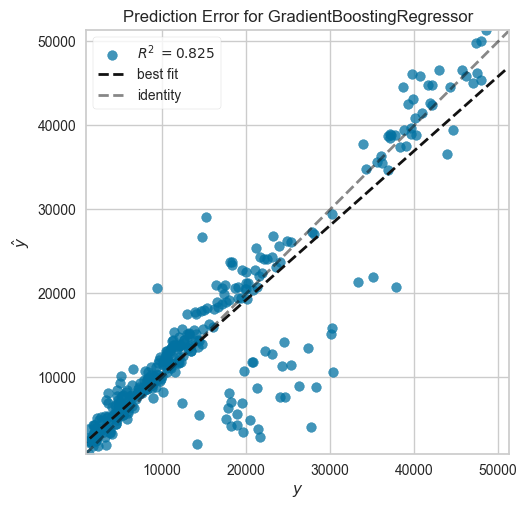

In [31]:
plot_model(tuned_gbr, plot="error")

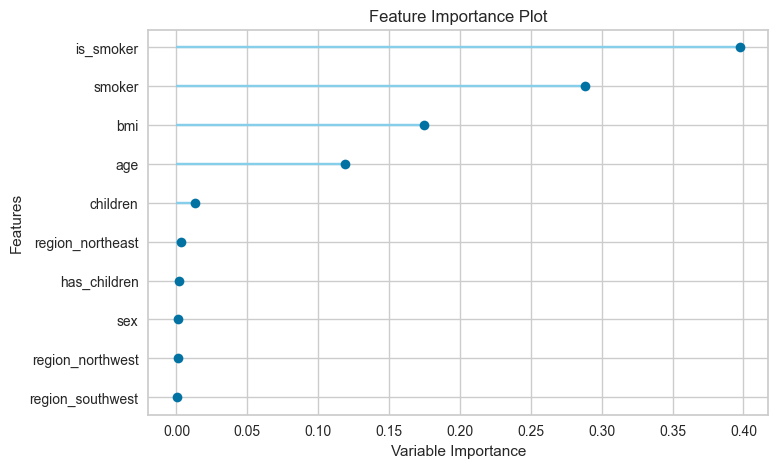

In [32]:
plot_model(tuned_gbr, plot="feature")

In [33]:
plot_model(tuned_gbr, plot="parameter")

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,squared_error
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


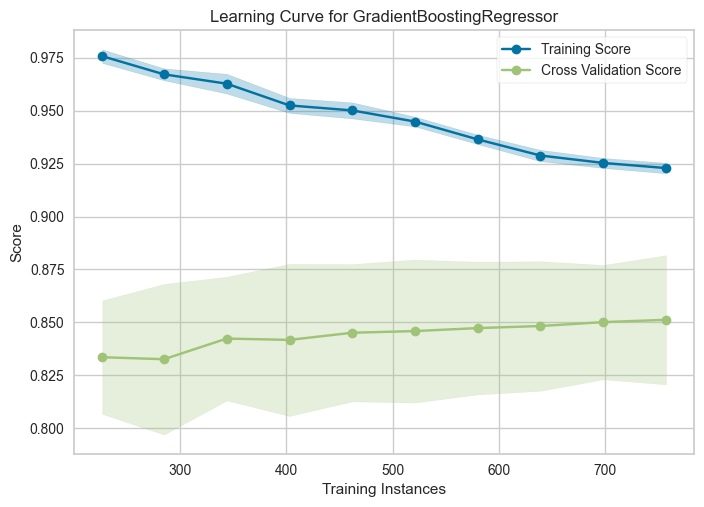

In [34]:
plot_model(tuned_gbr, plot="learning")

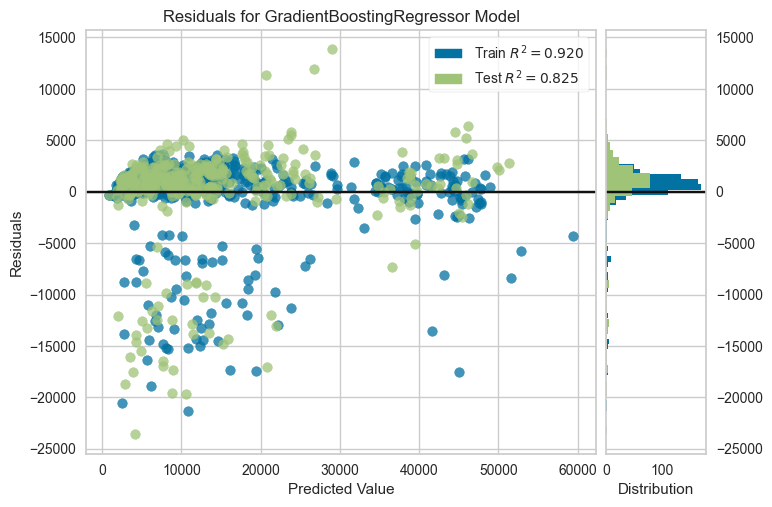

In [35]:
plot_model(tuned_gbr, plot="residuals")

### Making Predictions
- We will perform a last verification, analyzing the assessment metrics and forecasting the test set.
- Verifying the performance difference between the cross-validation results and new data is the goal here.

In [36]:
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2836.0370,24432341.0024,4942.9082,0.8254,0.4417,0.2836


- The R2 on the test set was 0.8447, compared to 0.8263 in the previous average. This is not a noteworthy distinction.
- In most cases, a large disparity between these data would point to over-fitting or other issues that would need more research. In this instance, let's proceed to completing the model and forecasting on unobserved sets.
- Everything is prepared for the model's completion.

### Finalizing the Model
- Finalizing the model is the last step of our project.
- The `finalize_model()` function fits the model, including the previously separated test set within PyCaret (30% in this case).
- The purpose of this is to train the model on the complete dataset before deploying to production.

In [37]:
final_gbr = finalize_model(tuned_gbr)

- Using the `finalize_model()` function, the entire dataset, including the part that had previously been separated for testing, is used for training.

- Because you will be making predictions based on data that the model has previously seen, the results will be deceptive if the model is used to make predictions on the test set separated by PyCaret after the finalize function has been called.

I'll use the finished model and `predict_model()` to compare the outcomes with the ones from the previous section to illustrate this.

In [38]:
pred_holdout = predict_model(final_gbr)

In [39]:
print(final_gbr)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children',
                                             'is_smoker', 'has_children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(includ...
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
             

### Predicting on New Data
- The data that was segregated at the start of the project but has not yet been viewed by the model will now be passed as data.
- Only 10% of the original dataset is included in this set. This portion has never been exposed to PyCaret, and is perfect for simulating new real data that will be received by the model in production.

In [40]:
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2374.1803,16658502.0645,4081.4828,0.8877,0.3686,0.3004


,age,sex,bmi,children,smoker,region,is_smoker,has_children,charges,prediction_label
0,37,male,24.320000,2,no,northwest,0,1,6198.751953,7975.720381
1,52,male,32.775002,3,no,northwest,0,1,11289.109375,14120.737331
2,26,male,32.900002,2,yes,southwest,1,1,36085.218750,34995.022574
3,37,female,29.500000,2,no,southwest,0,1,6311.952148,7025.305464
4,62,male,32.110001,0,no,northeast,0,0,13555.004883,14453.114651


- The label column is added to the new set.
- The Label is the value predicted by the GBR model.

## Conclusion
- We are aware that certain factors will have a direct impact on the price associated with health insurance.
- We also discovered that certain points are irrelevant while discussing the topic.
- Data like the number of children and the region have no bearing on this "charges" element in the context of our database. Even if a person has a very high body mass index (BMI), which is a measure of health and can suggest a high risk of health problems in the future, it does not necessarily signal a significant influence on costs.
- However, when determining the optimal contract value, health insurance takes into account a number of variables, most significant among them the client's age and whether or not he smokes.
- Through the produced graphs and, more importantly, the correlation matrix, which clearly identified the points of interest and irrelevant points, we were able to visually validate this information.
- We first separate training and test data before using Auto Machine Learning to generate our model with the PyCaret library.
- After the pipeline was established, we could automatically and quickly evaluate models to determine which one to use based on which model performed the best as measured by the R2 Score.
- In addition to using the Gradient Boosting Regressor (GBR), we also tune it automatically. Using the feature importance plot, we were also able to determine that clients who smoke frequently receive the most weight.
- We made predictions with a good degree of accuracy after completing the exploratory and model studies, achieving 0.8849 on previously unseen data. For example we can see:
    - **Real** - 48970.246094
    - **Predicted** - 48052.400889
    - **Real** - 1632.564453
    - **Predicted** - 2021.976012

- The potential of auto machine learning and how it may be utilized by data scientists and analysts as an optimizing tool were evident.
- Regarding this issue, there are a lot of other things to talk about, but with this project, you can use PyCaret and Auto Machine Learning as a starting point, and you may explore the library to develop even more complex work.